<a href="https://colab.research.google.com/github/Jolanta27/AI-course/blob/master/Dengue_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving final.csv to final (1).csv


In [3]:
import pandas as pd
df = pd.read_csv("final.csv")
df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


In [4]:
print(df.dtypes)

serial                int64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
conditions          float64
stations            float64
cases               float64
labels               object
dtype: object


## **Wprowadzenie do problemu**

Celem tego projektu jest przewidywanie liczby przypadków dengi przy użyciu warunków środowiskowych i pogodowych.

### Regresja
Regresja polega na przewidywaniu dokładnej liczby przypadków dengi na podstawie warunków środowiskowych i pogodowych.

### Klasyfikacja
Klasyfikacja polega na przypisaniu liczby przypadków dengi do jednej z kategorii (np. niska, średnia, wysoka dotkliwość) na podstawie kategorycznej etykiety dostarczonej w zbiorze danych.

## **Szczegółowy opis cech zbioru danych**

Zbiór danych zawiera różne cechy środowiskowe i pogodowe, które mogą wpływać na liczbę przypadków dengi. Oto szczegółowy opis tych cech:

- **tempmax**: Maksymalna temperatura w danym okresie
- **tempmin**: Minimalna temperatura w danym okresie
- **temp**: Średnia temperatura w danym okresie
- **feelslikemax**: Maksymalna temperatura odczuwalna
- **feelslikemin**: Minimalna temperatura odczuwalna
- **feelslike**: Średnia temperatura odczuwalna
- **dew**: Punkt rosy
- **humidity**: Średnia wilgotność w danym okresie
- **precip**: Ilość opadów w danym okresie
- **precipprob**: Prawdopodobieństwo opadów
- **precipcover**: Pokrycie opadami
- **snow**: Ilość śniegu w danym okresie
- **snowdepth**: Głębokość śniegu
- **windspeed**: Średnia prędkość wiatru w danym okresie
- **winddir**: Kierunek wiatru
- **sealevelpressure**: Ciśnienie na poziomie morza
- **cloudcover**: Pokrycie chmurami
- **visibility**: Widoczność
- **solarradiation**: Ilość promieniowania słonecznego
- **solarenergy**: Ilość energii słonecznej
- **uvindex**: Indeks UV
- **conditions**: Warunki pogodowe
- **stations**: Liczba stacji pogodowych raportujących dane

Do analizy regresji używamy zmiennej "cases", która reprezentuje liczbę przypadków dengi. Do celów klasyfikacji używamy zmiennej "labels", która klasyfikuje liczbę przypadków na kategorie (np. niska, średnia, wysoka dotkliwość).

In [5]:
# Opis cech zbioru danych
features = [
    'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike',
    'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth',
    'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
    'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'stations'
]
target_regression = 'cases'
target_classification = 'label'

print("Cechy środowiskowe i pogodowe:")
for feature in features:
    print(f"- {feature}")

print("\nZmienne docelowe:")
print(f"- Regresja: {target_regression}")
print(f"- Klasyfikacja: {target_classification}")

Cechy środowiskowe i pogodowe:
- tempmax
- tempmin
- temp
- feelslikemax
- feelslikemin
- feelslike
- dew
- humidity
- precip
- precipprob
- precipcover
- snow
- snowdepth
- windspeed
- winddir
- sealevelpressure
- cloudcover
- visibility
- solarradiation
- solarenergy
- uvindex
- conditions
- stations

Zmienne docelowe:
- Regresja: cases
- Klasyfikacja: label


#Zbiór danych pochodzi z Kaggle
**Esploracyjna analiza danych**

**Wizualizacja rozkładów danych**

- Korelacja między cechami

- Relacje między cechami a zmiennymi docelowymi

- Identyfikacja anomalii i wartości odstających

**Czyszczenie danych**

- Usuwanie brakujących danych

- Radzenie sobie z wartościami odstającymi

**Inżynieria cech**

- Tworzenie nowych cech

- Konwersja zmiennych kategorialnych

**Podział danych**

- Podział na zestawy treningowe, walidacyjne i testowe

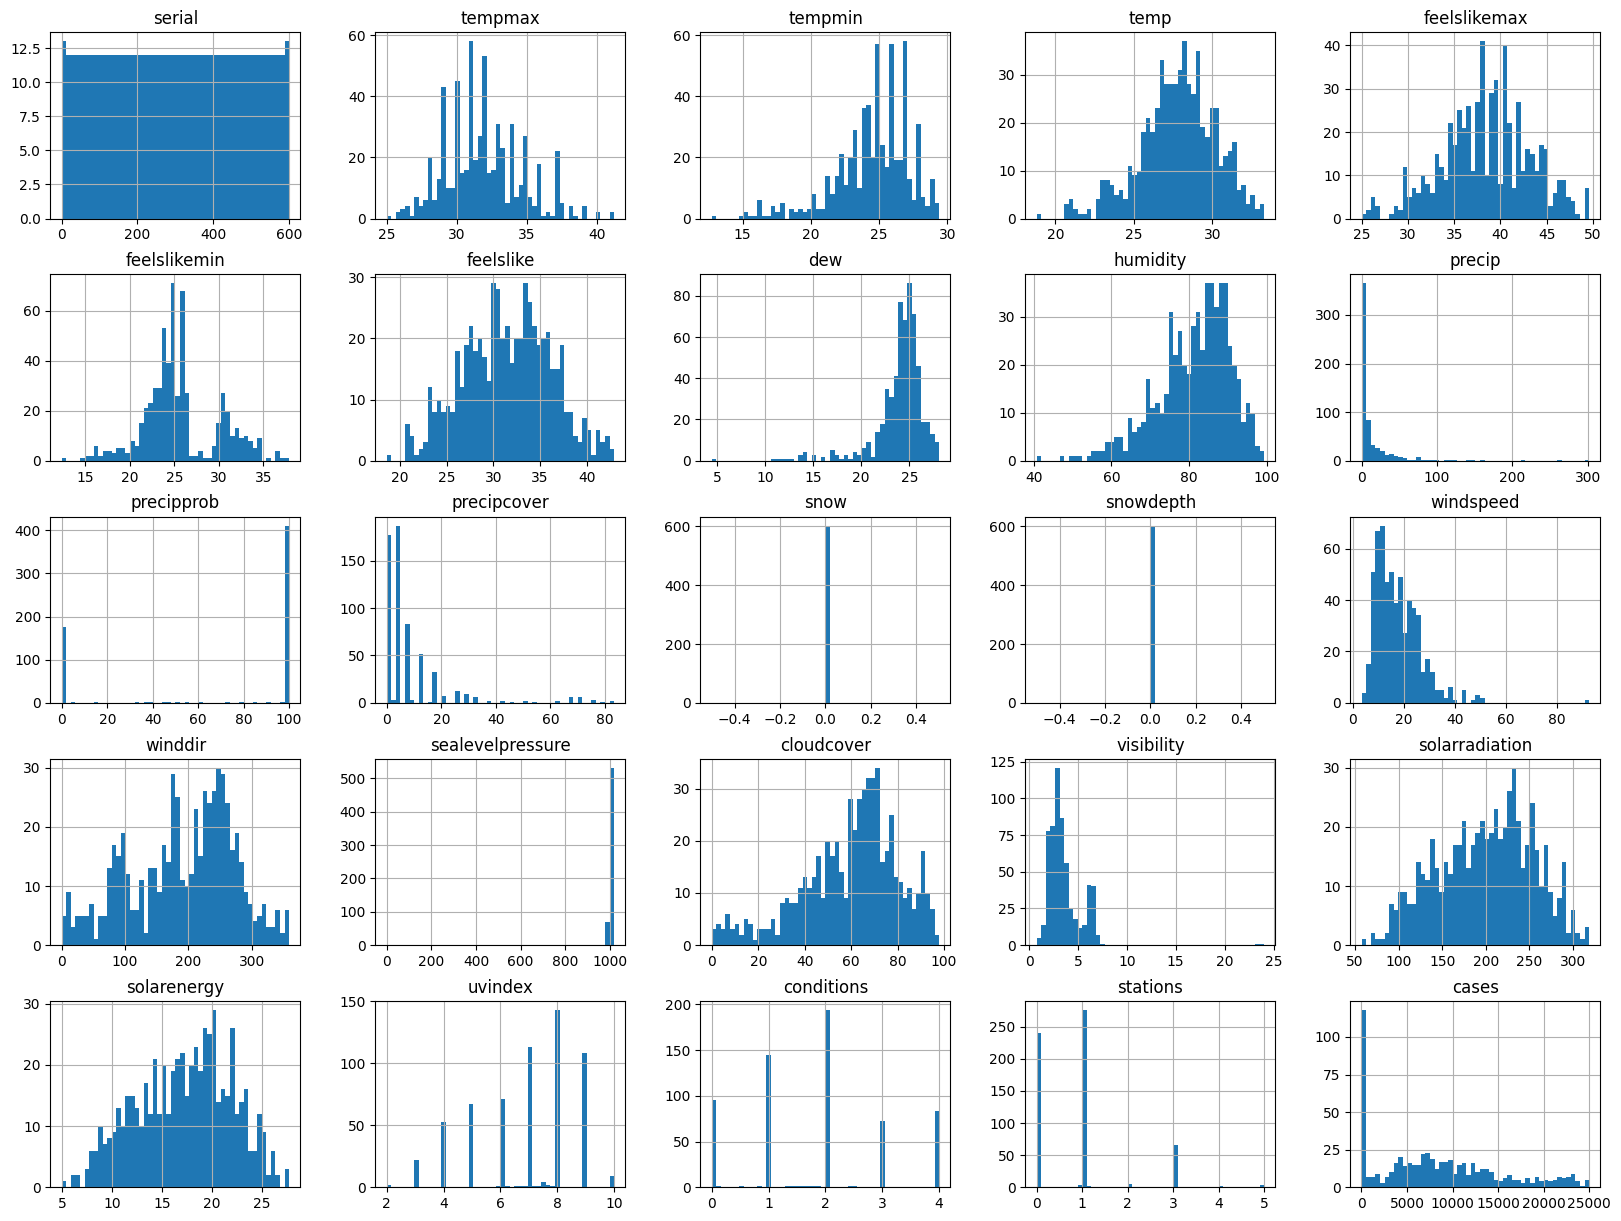

In [6]:
import matplotlib.pyplot as plt

# Wizualizacja rozkładów danych
data = pd.read_csv("final.csv")
data.hist(bins=50, figsize=(20, 15))
plt.show()

Kolumny tekstowe: Index(['labels'], dtype='object')


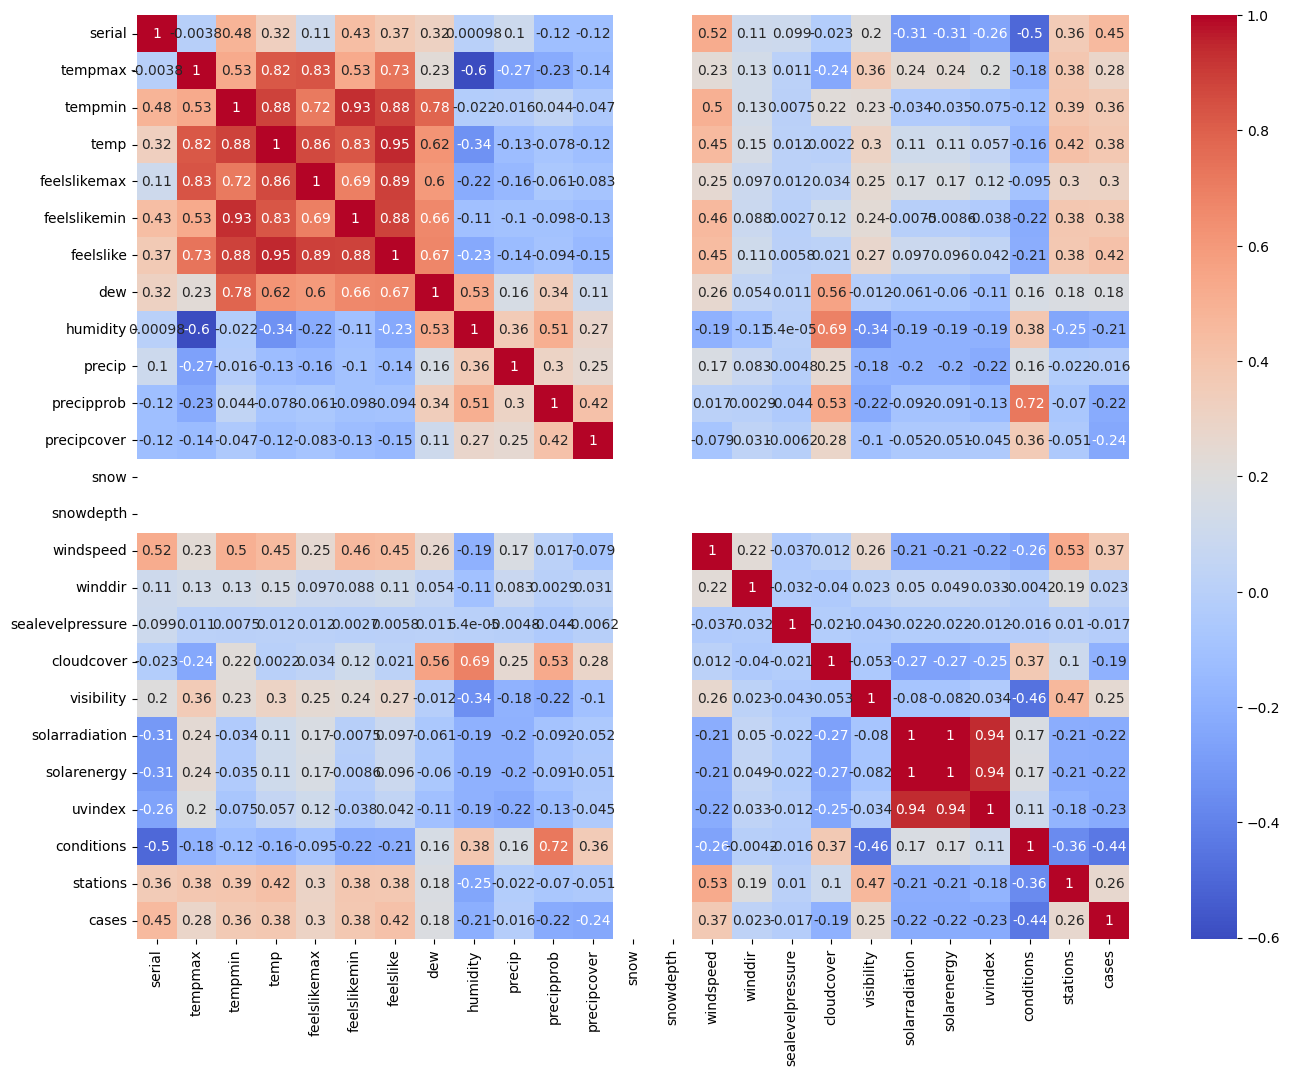

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identyfikacja kolumn tekstowych
text_columns = data.select_dtypes(include=['object']).columns
print("Kolumny tekstowe:", text_columns)

# Usunięcie kolumn tekstowych
data_numeric = data.drop(columns=text_columns)

# Korelacja między cechami
corr_matrix = data_numeric.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


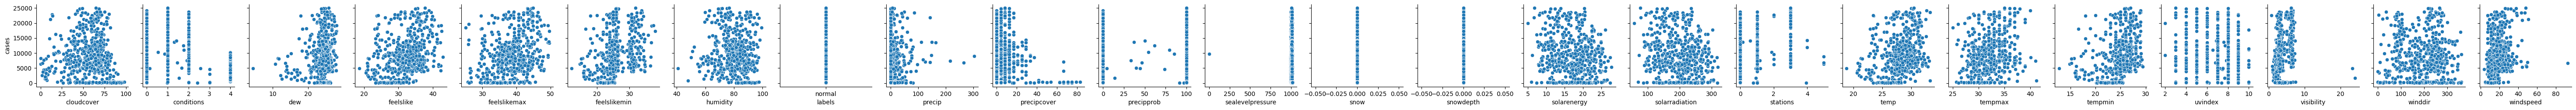

In [8]:
# Relacja między cechami a zmienną docelową
sns.pairplot(data, y_vars=['cases'], x_vars=data.columns.difference(['cases', 'serial']))
plt.show()

In [9]:
print(data.columns)

Index(['serial', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'stations', 'cases', 'labels'],
      dtype='object')


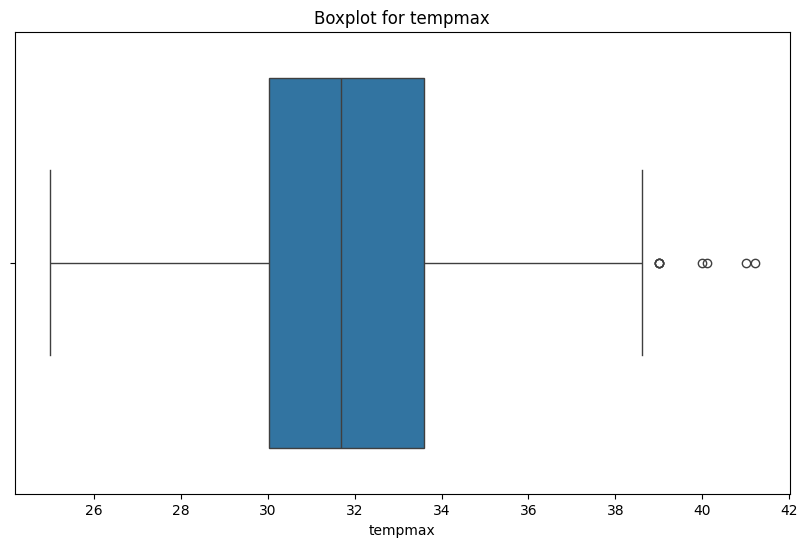

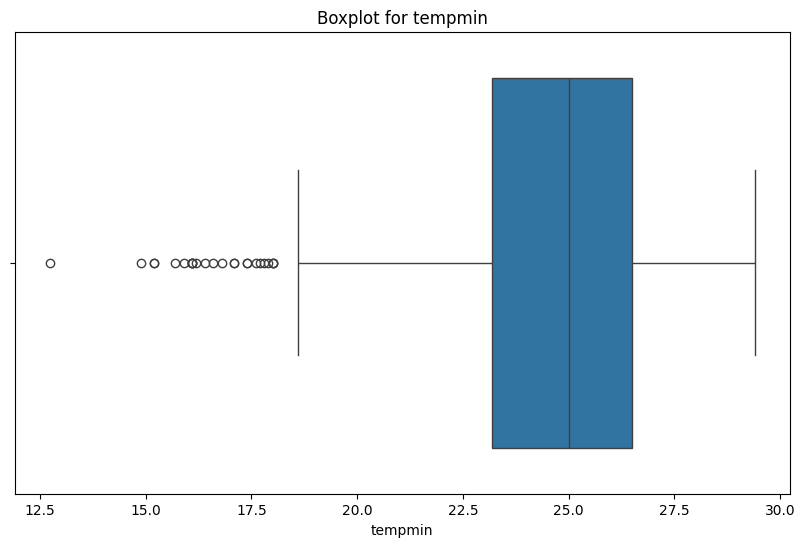

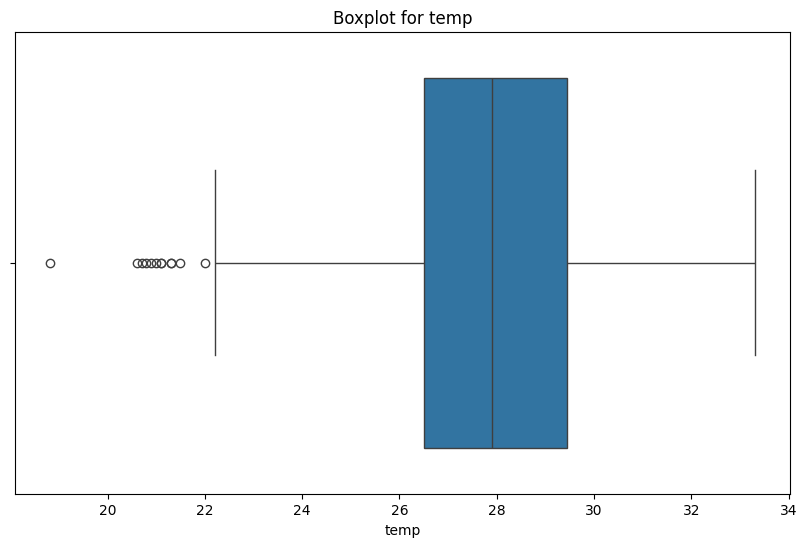

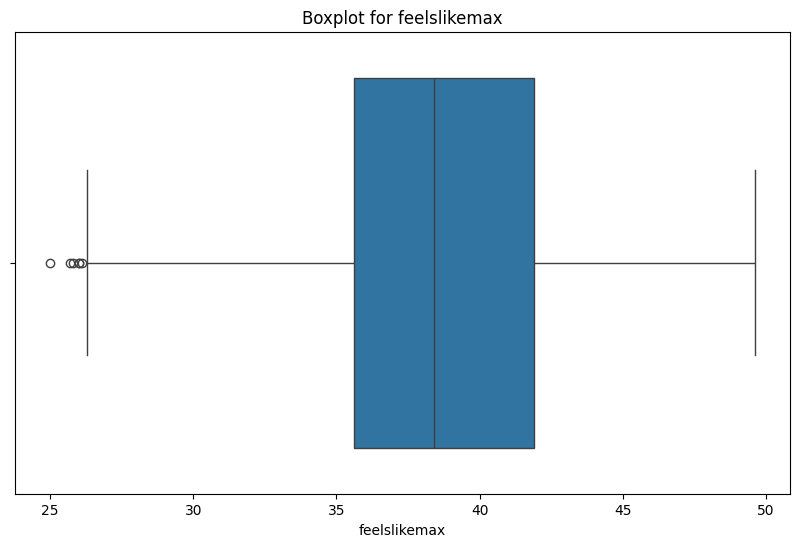

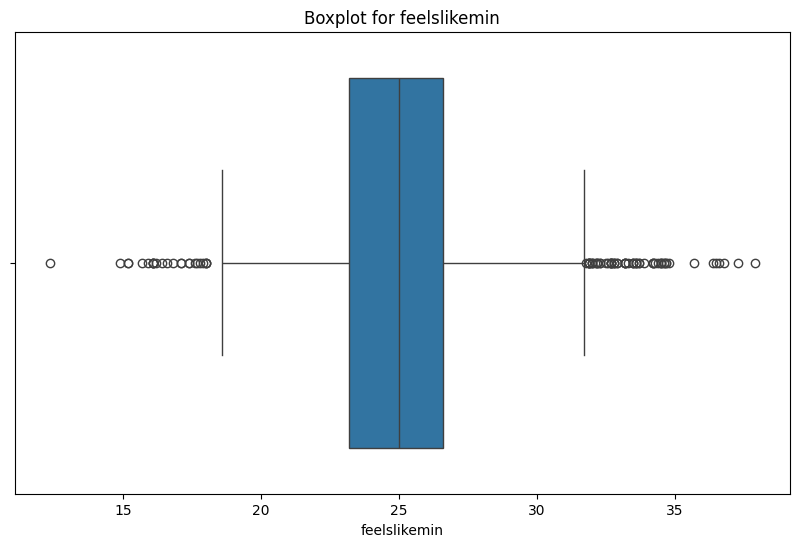

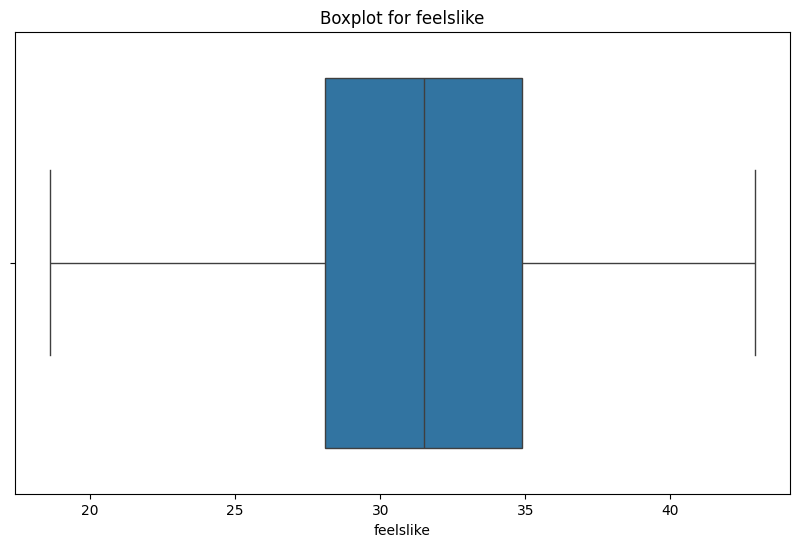

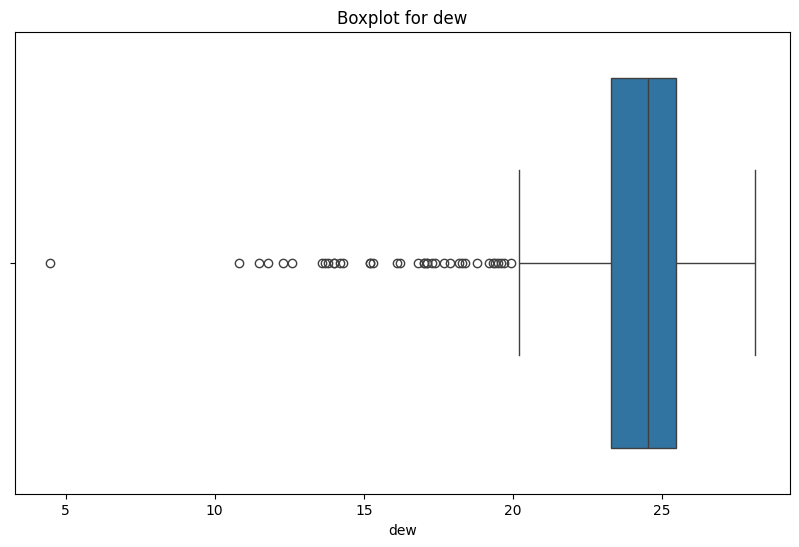

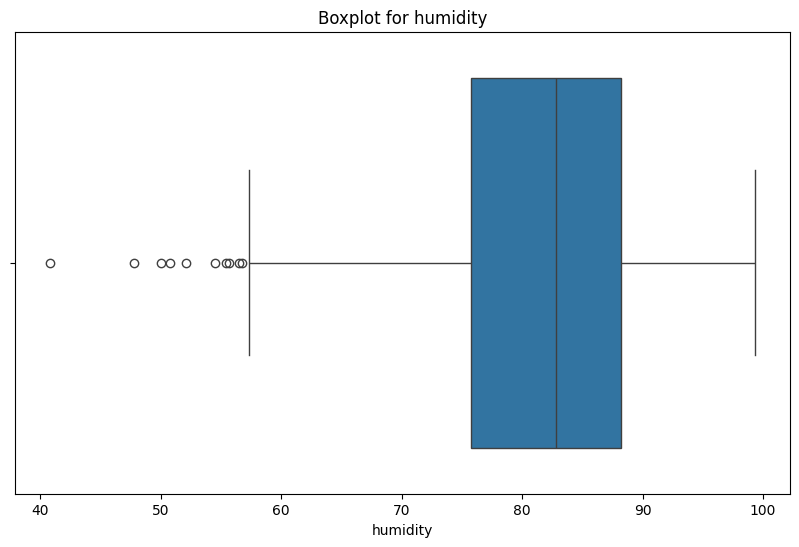

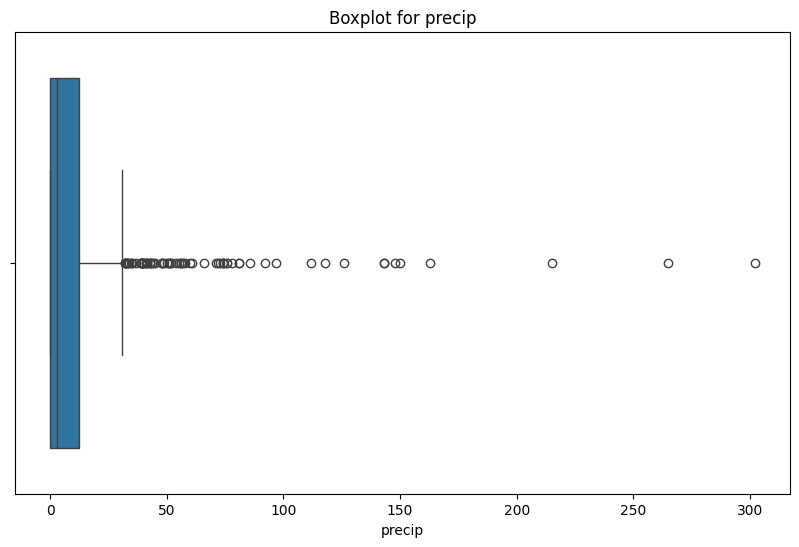

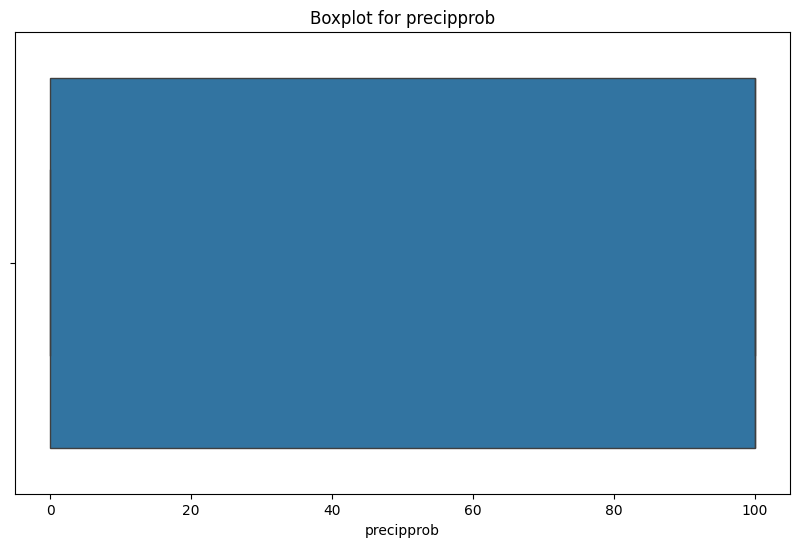

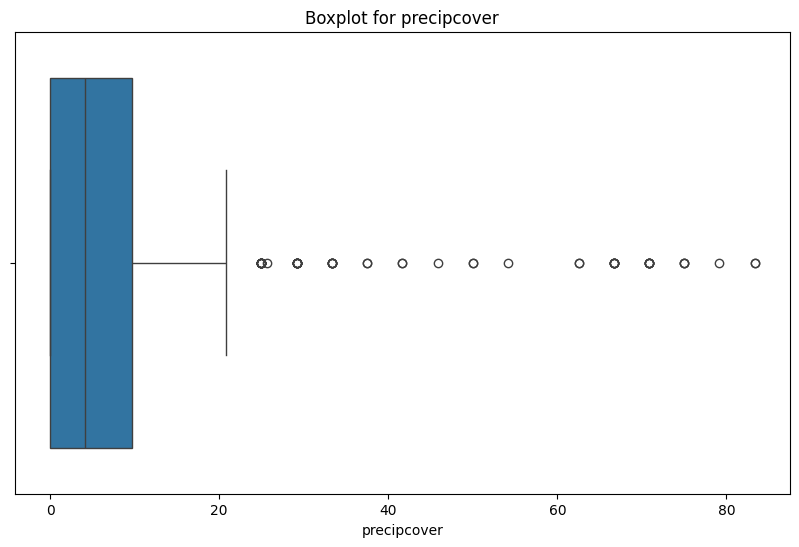

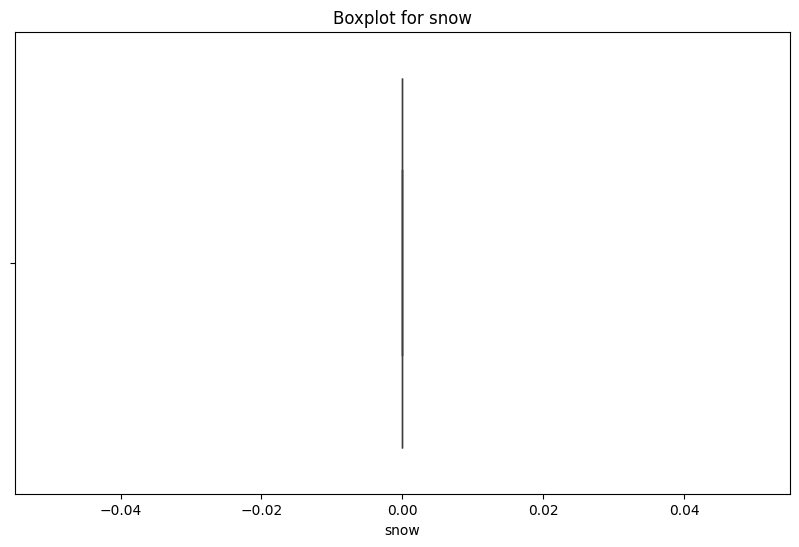

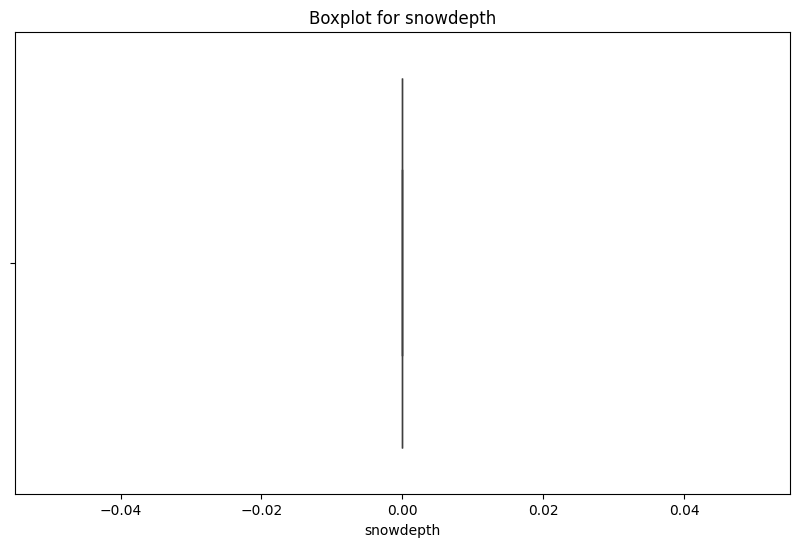

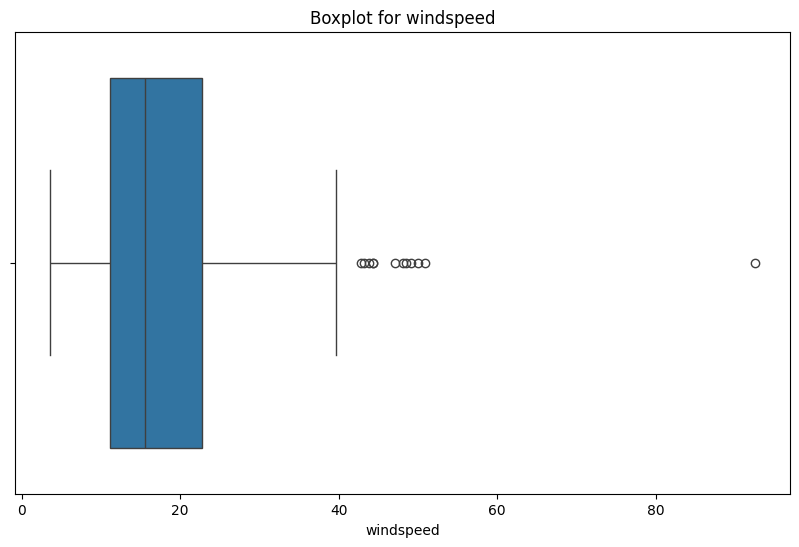

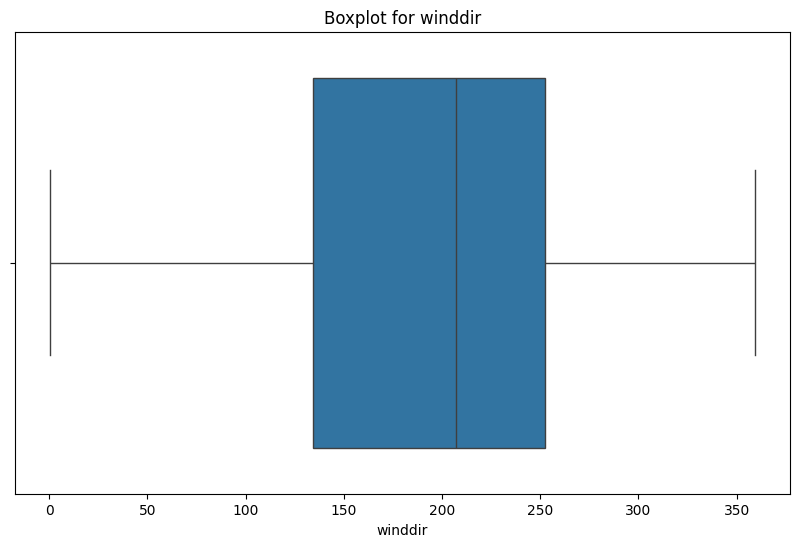

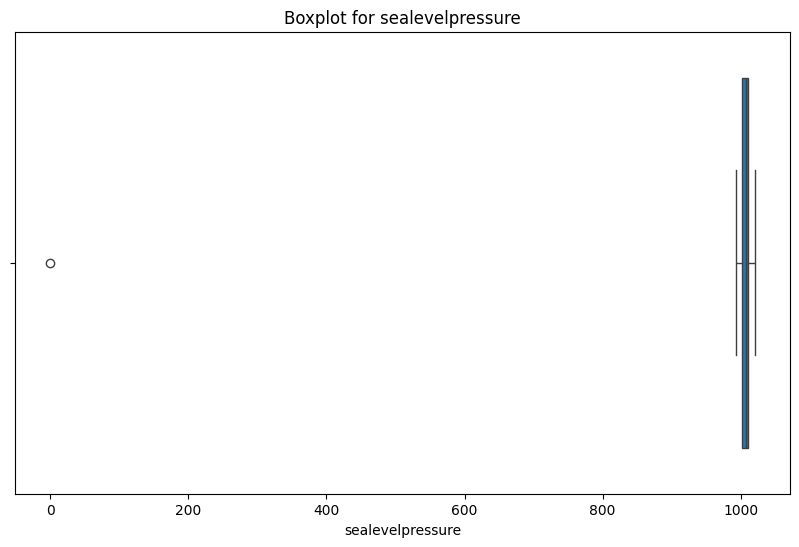

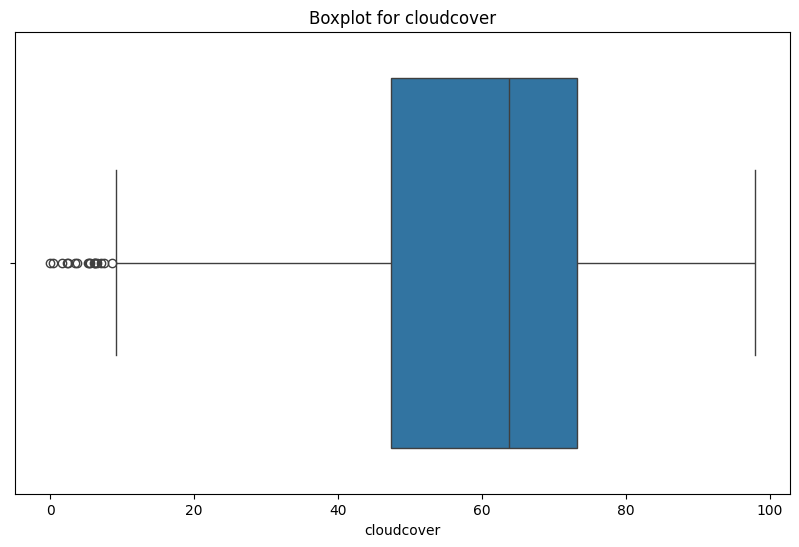

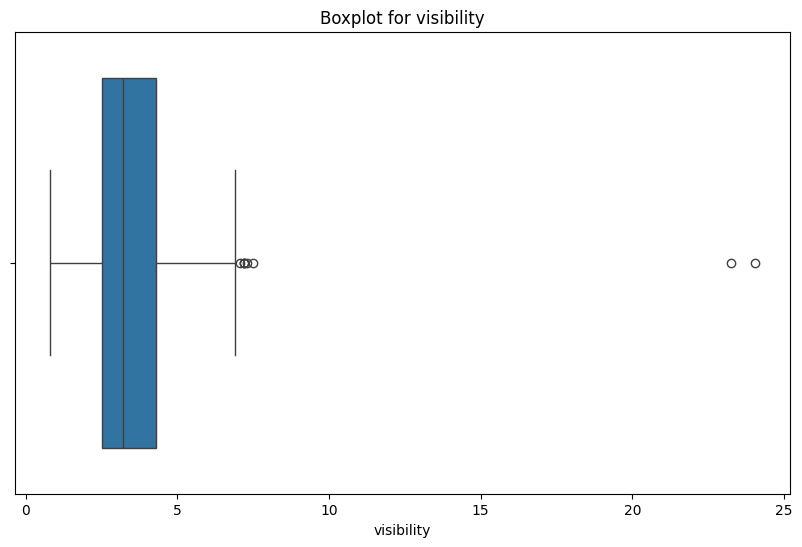

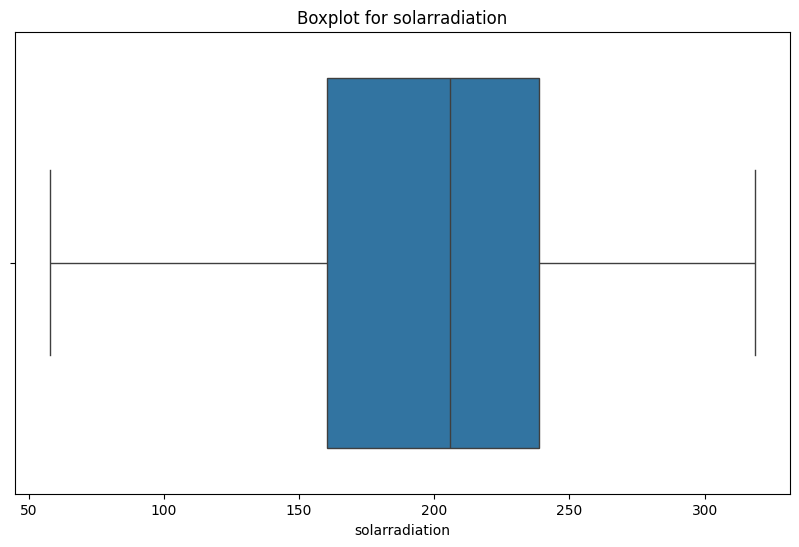

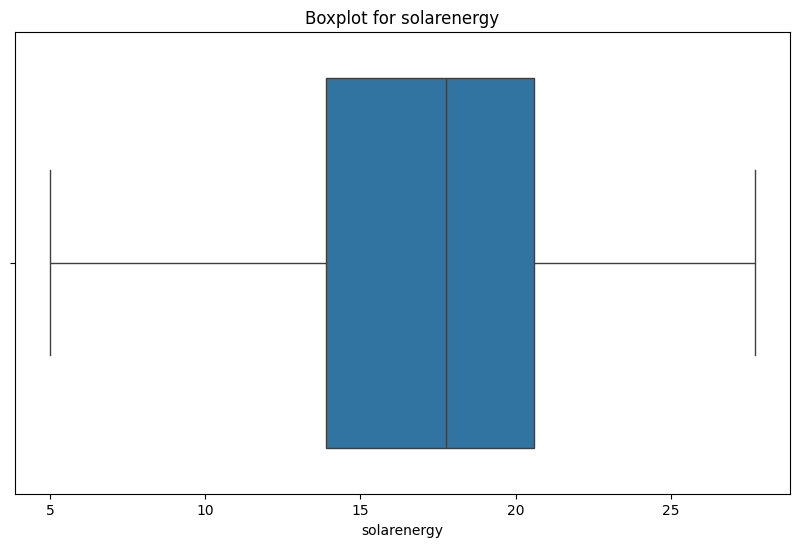

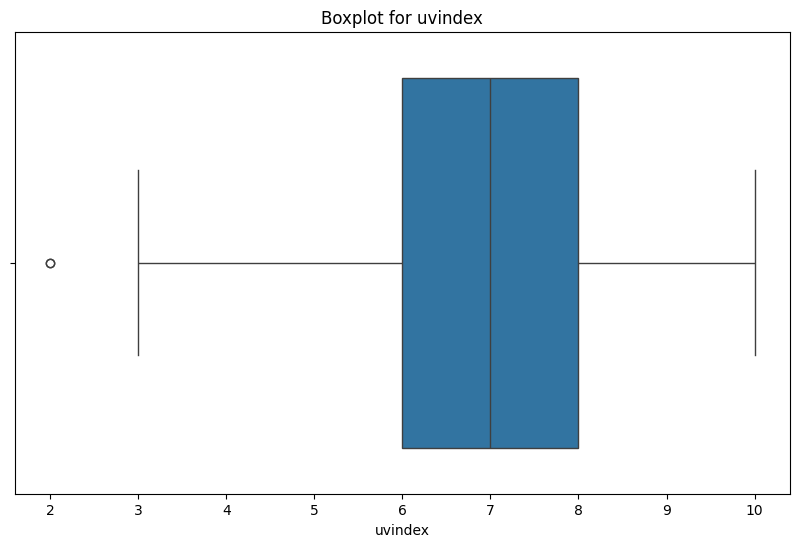

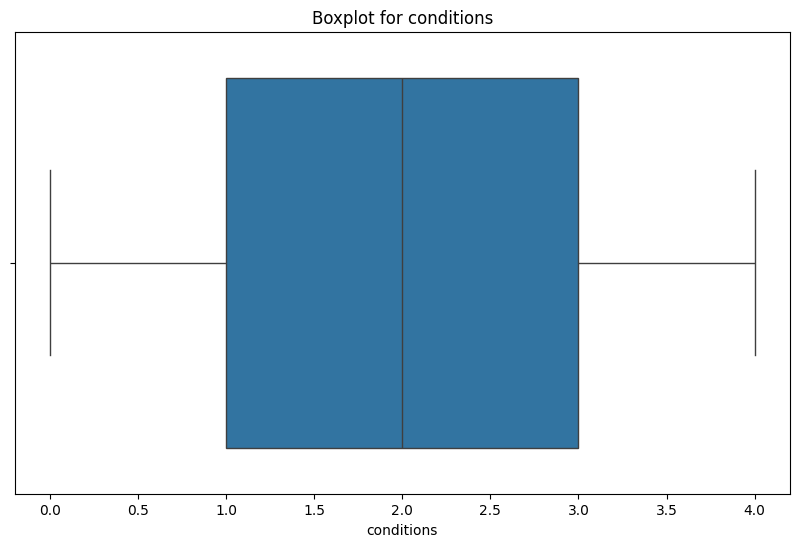

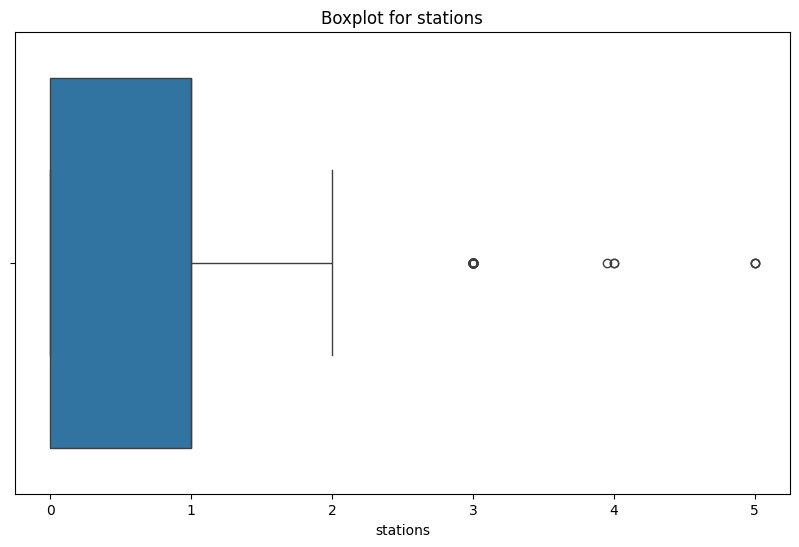

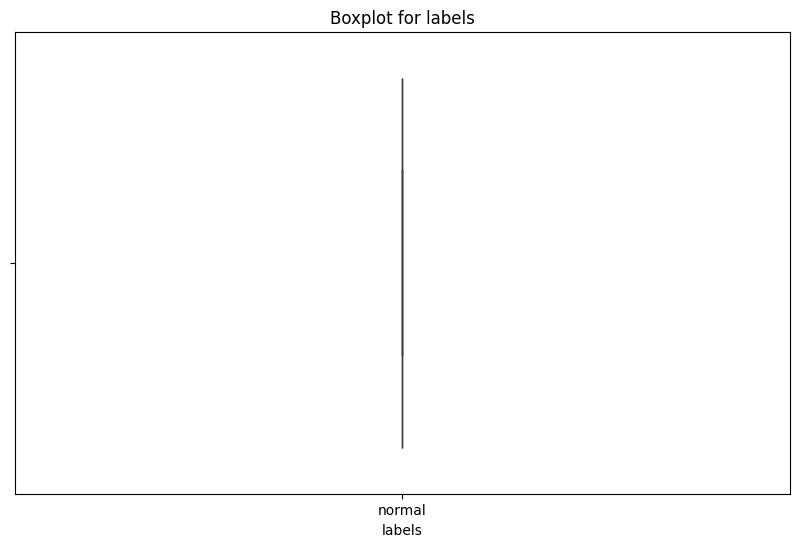

In [10]:
# Wykresy pudełkowe dla identyfikacji wartości odstających
for column in data.columns:
    if column not in ['cases', 'serial']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

In [11]:
# Identyfikacja kolumn tekstowych
text_columns = data.select_dtypes(include=['object']).columns
print("Kolumny tekstowe:", text_columns)

# Usunięcie kolumn tekstowych
data_numeric = data.drop(columns=text_columns)

# Usuwanie brakujących danych poprzez imputację
data_numeric.fillna(data_numeric.median(), inplace=True)

Kolumny tekstowe: Index(['labels'], dtype='object')


In [12]:
# Radzenie sobie z wartościami odstającymi poprzez ograniczanie
features = [
    'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike',
    'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth',
    'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
    'solarradiation', 'solarenergy', 'uvindex', 'stations'
]

for feature in features:
    if feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[feature] = data[feature].clip(lower_bound, upper_bound)


In [13]:
# Tworzenie cechy dzień roku
data['day_of_year'] = pd.to_datetime(data['serial']).dt.dayofyear

In [24]:
from sklearn.model_selection import train_test_split

# Podział danych na zestawy treningowe, walidacyjne i testowe
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Oddzielenie cech i zmiennych docelowych
X = data.drop(columns=['cases', 'serial'])
y = data['cases']

In [15]:
# Sprawdzenie rozmiarów zestawów danych
print(f"Rozmiar zestawu treningowego: {X_train.shape[0]}")
print(f"Rozmiar zestawu walidacyjnego: {X_val.shape[0]}")
print(f"Rozmiar zestawu testowego: {X_test.shape[0]}")

# Sprawdzenie rozkładu zmiennej docelowej
print("\nRozkład zmiennej docelowej (cases):")
print("Zestaw treningowy:")
print(y_train_reg.describe())
print("\nZestaw walidacyjny:")
print(y_val_reg.describe())
print("\nZestaw testowy:")
print(y_test_reg.describe())

# Sprawdzenie statystyk opisowych dla cech
print("\nStatystyki opisowe dla cech:")
print("Zestaw treningowy:")
print(X_train.describe())
print("\nZestaw walidacyjny:")
print(X_val.describe())
print("\nZestaw testowy:")
print(X_test.describe())

Rozmiar zestawu treningowego: 360
Rozmiar zestawu walidacyjnego: 121
Rozmiar zestawu testowego: 121

Rozkład zmiennej docelowej (cases):
Zestaw treningowy:
count      360.000000
mean      8707.522222
std       6781.394557
min         52.000000
25%       3460.500000
50%       7834.000000
75%      13422.000000
max      24838.000000
Name: cases, dtype: float64

Zestaw walidacyjny:
count      121.000000
mean      8465.702479
std       7094.654554
min         53.000000
25%       2622.000000
50%       6947.000000
75%      12482.000000
max      24910.000000
Name: cases, dtype: float64

Zestaw testowy:
count      121.000000
mean      7928.528926
std       6473.290856
min         97.000000
25%       3225.000000
50%       7002.000000
75%      11327.000000
max      24983.000000
Name: cases, dtype: float64

Statystyki opisowe dla cech:
Zestaw treningowy:
          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  360.000000  360.000000  360.000000    360.000000    360.000000   

In [16]:
print(data.head())

   serial    tempmax    tempmin       temp  feelslikemax  feelslikemin  \
0       0  34.053151  24.478082  28.709863     39.757808     25.317808   
1       1  34.086179  25.694309  29.464228     41.338211     28.140650   
2       2  34.573984  25.417886  29.526829     40.464228     26.560163   
3       3  33.020325  25.080488  28.727642     37.878049     26.193496   
4       4  30.660976  24.230894  26.774797     36.586992     24.263415   

   feelslike        dew   humidity     precip  ...  cloudcover  visibility  \
0  32.306301  22.971233  73.508219   2.921726  ...   50.747945    3.789863   
1  34.423577  23.484553  72.066667   3.783415  ...   48.313821    2.884553   
2  33.085366  22.580488  69.424390   3.065854  ...   55.621138    4.242276   
3  31.772358  21.752033  69.297561   6.025203  ...   50.208130    2.991057   
4  28.943902  24.214634  86.652033  23.336585  ...   45.542276    3.886992   

   solarradiation  solarenergy   uvindex  conditions  stations    cases  \
0      208.

## **Plan działania**

1. **Trening i walidacja modeli Scikit-learn**
   - Regresja liniowa
   - Regresja logistyczna
   - Drzewa decyzyjne
   - Las losowy
4. **Trening i walidacja modelu Keras**
   - Sieć neuronowa
5. **Ocena modeli i wybór najlepszego**


In [17]:
!pip install keras==2.12.0

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np

In [26]:
#Zidentyfikowanie kolumn zawierajacych wartosci tekstowe
print(X_train.dtypes)

tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
conditions          float64
stations            float64
labels               object
day_of_year           int32
dtype: object


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identyfikacja kolumn tekstowych
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Tworzenie transformatora do kodowania one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Transformacja danych
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tworzenie modelu regresji liniowej
model = LinearRegression()

# Trening modelu regresji liniowej
model.fit(X_train_resampled, y_train_resampled)
y_pred_val = model.predict(X_val_transformed)

# Obliczenie błędu średniokwadratowego
mse = mean_squared_error(y_val, y_pred_val)
print("Mean Squared Error dla regresji liniowej:", mse)

Mean Squared Error dla regresji liniowej: 33124952.035849947


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Identyfikacja kolumn tekstowych
categorical_features = X_train.select_dtypes(include=['object']).columns

# Tworzenie transformatora kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Tworzenie modelu Las losowy
rf = RandomForestRegressor(random_state=42)

# Tworzenie pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf)
])

# Definicja siatki parametrów
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_val = best_rf.predict(X_val)

# Obliczenie błędu średniokwadratowego
mse = mean_squared_error(y_val, y_pred_val)
print("MSE dla lasu losowego:", mse)

MSE dla lasu losowego: 26516229.774400953


In [78]:
# Identyfikacja kolumn tekstowych
categorical_features = X_train.select_dtypes(include=['object']).columns

# Tworzenie transformatora kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Funkcja tworząca model Keras
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# KerasRegressor
keras_reg = KerasRegressor(build_fn=create_model, verbose=0)

# Tworzenie pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', keras_reg)
])

# Definicja siatki parametrów
param_grid = {
    'model__epochs': [50, 100],
    'model__batch_size': [10, 20]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_keras = grid_search.best_estimator_
y_pred_val = best_keras.predict(X_val)

# Obliczenie błędu średniokwadratowego
mse = mean_squared_error(y_val, y_pred_val)
print("MSE dla sieci neuronowej:", mse)

<ipython-input-78-0e060593a8d2>:22: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=create_model, verbose=0)


MSE dla sieci neuronowej: 31075117.894609995


In [81]:
# Identyfikacja kolumn tekstowych
categorical_features = X_train.select_dtypes(include=['object']).columns

# Tworzenie transformatora kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Tworzenie modelu drzewa decyzyjnego
tree = DecisionTreeRegressor(random_state=42)

# Tworzenie pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', tree)
])

# Definicja siatki parametrów
param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 10, 20]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
y_pred_val = best_tree.predict(X_val)

# Obliczenie błędu średniokwadratowego
mse = mean_squared_error(y_val, y_pred_val)
print("MSE dla drzewa decyzyjnego:", mse)

MSE dla drzewa decyzyjnego: 40132608.69052768


In [84]:
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline

# Zrównoważenie danych za pomocą RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_transformed, y_train)

# Tworzenie pipeline'u
pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000))  # Zwiększenie liczby iteracji
])

# Trening modelu regresji logistycznej
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_val = pipeline.predict(X_val_transformed)
print("Accuracy dla regresji logistycznej:", accuracy_score(y_val, y_pred_val))

Accuracy dla regresji logistycznej: 0.0


In [85]:
#Sprawdzenie przeksztalconych danych
print(X_train_transformed.shape)
print(X_val_transformed.shape)
print(X_test_transformed.shape)

(421, 25)
(90, 25)
(91, 25)


In [86]:
#Sprawdzenie zrównoważonych danych
print(pd.Series(y_train_resampled).value_counts())

cases
6868.0     3
292.0      3
20146.0    3
6189.0     3
6336.0     3
          ..
5153.0     3
16305.0    3
6947.0     3
4545.0     3
3464.0     3
Name: count, Length: 410, dtype: int64


In [87]:
from sklearn.tree import DecisionTreeClassifier

# Tworzenie pipeline'u z DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Trening modelu drzewa decyzyjnego
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_val = pipeline.predict(X_val_transformed)
print("Accuracy dla drzewa decyzyjnego:", accuracy_score(y_val, y_pred_val))

Accuracy dla drzewa decyzyjnego: 0.0


In [88]:
print("Pierwsze 5 wierszy X_train_transformed:")
print(X_train_transformed[:5])

print("Pierwsze 5 wierszy y_train_resampled:")
print(y_train_resampled[:5])

Pierwsze 5 wierszy X_train_transformed:
[[ 1.         -0.3152144   0.54263706 -0.16860495  0.59943225  0.16373222
   0.00627622  1.21419753  1.4571822   1.98771753  0.67620327  0.69782737
   0.          0.         -0.34497922 -0.86594917 -1.54133459  0.81684325
  -0.67197951 -0.55545085 -0.56680802 -0.9972278   0.18618026  0.24918036
   1.        ]
 [ 1.          0.8203126   0.66077696  1.02348834 -0.07589744  0.24602252
   0.3454069  -1.51509486 -2.31792709 -0.76702487 -1.50438632 -0.92768264
   0.          0.          0.02680512 -1.37473757  0.40752751 -0.63952147
   0.18751052 -1.10393975 -1.11500305 -0.9972278  -0.63168301  0.24918036
   1.        ]
 [ 1.         -1.4507414   0.14883739 -0.80722635 -0.81453929 -0.11056879
  -0.90513748  0.50458151  1.58925599  1.98771753  0.67620327  1.78106724
   0.          0.         -0.34497922 -1.04080724 -0.51174706  0.78781272
  -0.87032337 -0.50807307 -0.50355475 -0.9972278   0.18618026  0.24918036
   1.        ]
 [ 1.          0.8203126   

## **Kroki do oceny modeli regresji i klasyfikacji**

1. **Ocena modeli regresji**:
   - Użycie metryk RMSE (Root Mean Squared Error) i MAE (Mean Absolute Error)

2. **Ocena modeli klasyfikacji**:
   - Użycie metryk takich jak accuracy, precision, recall i F1-score
   - Wdrożenie krzywych ROC (Receiver Operating Characteristic) i AUC (Area Under the Curve)

3. **Walidacja i testowanie**:
   - Ocena wydajności modelu na zbiorze walidacyjnym
   - Testowanie na niewidocznym zbiorze danych

4. **Porównanie modeli**:
   - Porównanie różnych modeli



In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Przykład oceny modeli regresji
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae = mean_absolute_error(y_val, y_pred_val)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 7011.710567963348
MAE: 4851.488888888889


In [34]:
!pip install -U imbalanced-learn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [38]:
!pip uninstall -y imbalanced-learn scikit-learn

Found existing installation: imbalanced-learn 0.12.3
Uninstalling imbalanced-learn-0.12.3:
  Successfully uninstalled imbalanced-learn-0.12.3
Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1


In [39]:
!pip install imbalanced-learn==0.9.1 scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 28.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install imbalanced-learn==0.9.1 and scikit-learn==1.0.2 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested scikit-learn==1.0.2
    imbalanced-learn 0.9.1 depends on scikit-learn>=1.1.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [43]:
!pip uninstall -y imbalanced-learn scikit-learn

In [44]:
!pip install imbalanced-learn==0.9.1 scikit-learn==1.0.2

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install imbalanced-learn==0.9.1 and scikit-learn==1.0.2 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested scikit-learn==1.0.2
    imbalanced-learn 0.9.1 depends on scikit-learn>=1.1.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [45]:
!pip uninstall -y imbalanced-learn scikit-learn

In [1]:
!pip install imbalanced-learn==0.10.1 scikit-learn==1.1.3

                Model  Accuracy (Val)  Precision (Val)  Recall (Val)  \
0  LogisticRegression           0.815         0.966887      0.820225   
1        DecisionTree           0.855         0.925714      0.910112   
2        RandomForest           0.865         0.941520      0.904494   
3       NeuralNetwork           0.880         0.942529      0.921348   

   F1-score (Val)  AUC (Val)  Accuracy (Test)  Precision (Test)  \
0        0.887538   0.849081            0.820          0.961290   
1        0.917847   0.659602            0.835          0.939759   
2        0.922636   0.841292            0.875          0.932584   
3        0.931818   0.893003            0.890          0.933702   

   Recall (Test)  F1-score (Test)  AUC (Test)  
0       0.832402         0.892216    0.892259  
1       0.871508         0.904348    0.697659  
2       0.927374         0.929972    0.870178  
3       0.944134         0.938889    0.824421  


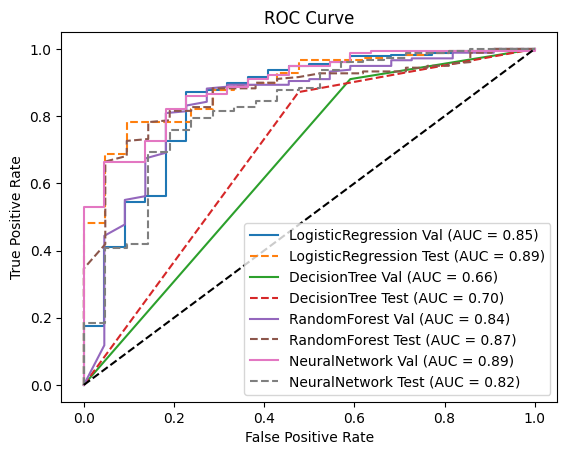

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Generowanie przykładowego zbioru danych
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.1, 0.9], random_state=42)

# Podział na zbiór treningowy, walidacyjny i testowy
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Zastosowanie SMOTE do oversamplingu mniejszościowej klasy
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definiowanie modeli do porównania
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=1000)
}

# Inicjalizacja listy do przechowywania wyników
results = []

# Trening i ocena każdego modelu
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Trening modelu
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Ocena na zbiorze walidacyjnym
    y_pred_val = pipeline.predict(X_val)
    y_prob_val = pipeline.predict_proba(X_val)[:, 1]
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val)

    # Krzywa ROC i AUC na zbiorze walidacyjnym
    fpr_val, tpr_val, _ = roc_curve(y_val, y_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)

    # Testowanie na zbiorze testowym
    y_pred_test = pipeline.predict(X_test)
    y_prob_test = pipeline.predict_proba(X_test)[:, 1]
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Krzywa ROC i AUC na zbiorze testowym
    fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Dodanie wyników do listy
    results.append({
        'Model': model_name,
        'Accuracy (Val)': accuracy_val,
        'Precision (Val)': precision_val,
        'Recall (Val)': recall_val,
        'F1-score (Val)': f1_val,
        'AUC (Val)': roc_auc_val,
        'Accuracy (Test)': accuracy_test,
        'Precision (Test)': precision_test,
        'Recall (Test)': recall_test,
        'F1-score (Test)': f1_test,
        'AUC (Test)': roc_auc_test
    })

    # Rysowanie krzywej ROC dla zbioru walidacyjnego
    plt.plot(fpr_val, tpr_val, label=f'{model_name} Val (AUC = {roc_auc_val:.2f})')

    # Rysowanie krzywej ROC dla zbioru testowego
    plt.plot(fpr_test, tpr_test, linestyle='--', label=f'{model_name} Test (AUC = {roc_auc_test:.2f})')

# Konwersja wyników do DataFrame
results_df = pd.DataFrame(results)

# Wyświetlenie tabeli wyników
print(results_df)

# Wyświetlenie krzywych ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
print(data.columns)

Index(['serial', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'stations', 'cases', 'labels'],
      dtype='object')


                Model  Accuracy (Val)  Precision (Val)  Recall (Val)  \
0  LogisticRegression           0.815         0.966887      0.820225   
1        DecisionTree           0.855         0.925714      0.910112   
2        RandomForest           0.865         0.941520      0.904494   
3       NeuralNetwork           0.880         0.942529      0.921348   

   F1-score (Val)  AUC (Val)  Accuracy (Test)  Precision (Test)  \
0        0.887538   0.849081            0.820          0.961290   
1        0.917847   0.659602            0.835          0.939759   
2        0.922636   0.841292            0.875          0.932584   
3        0.931818   0.893003            0.890          0.933702   

   Recall (Test)  F1-score (Test)  AUC (Test)  
0       0.832402         0.892216    0.892259  
1       0.871508         0.904348    0.697659  
2       0.927374         0.929972    0.870178  
3       0.944134         0.938889    0.824421  


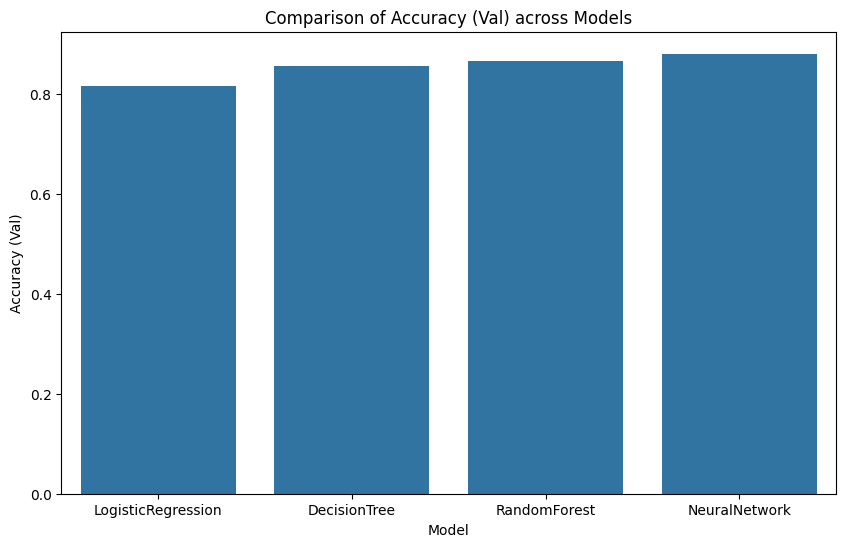

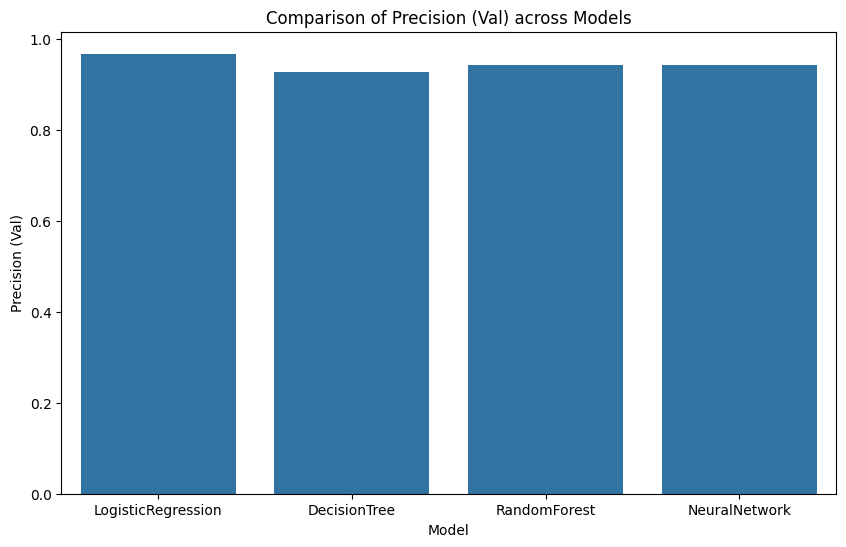

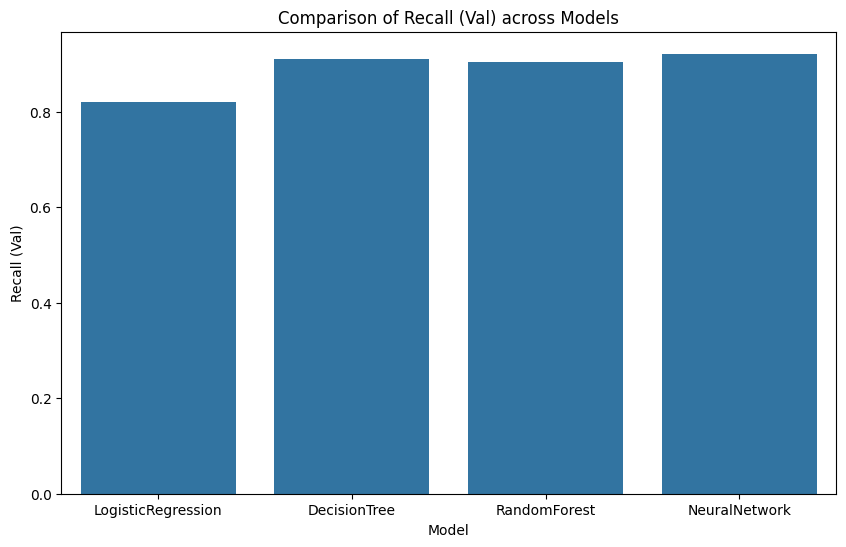

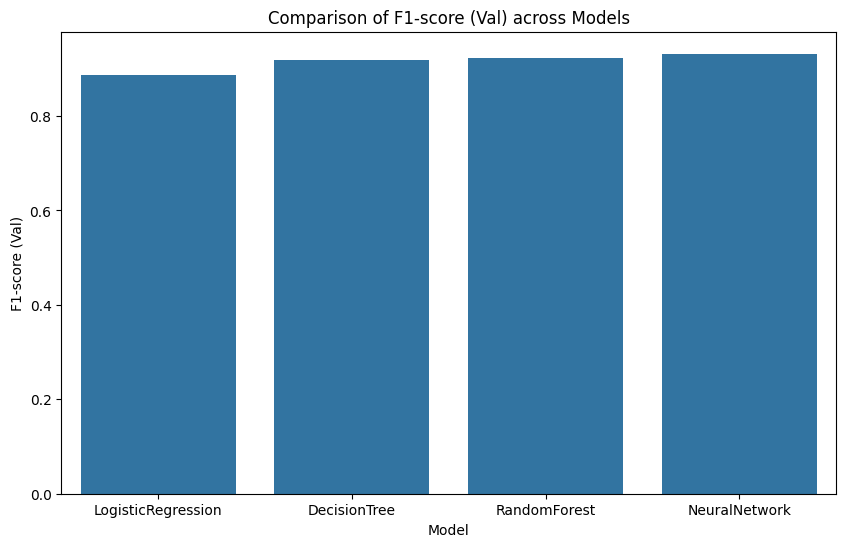

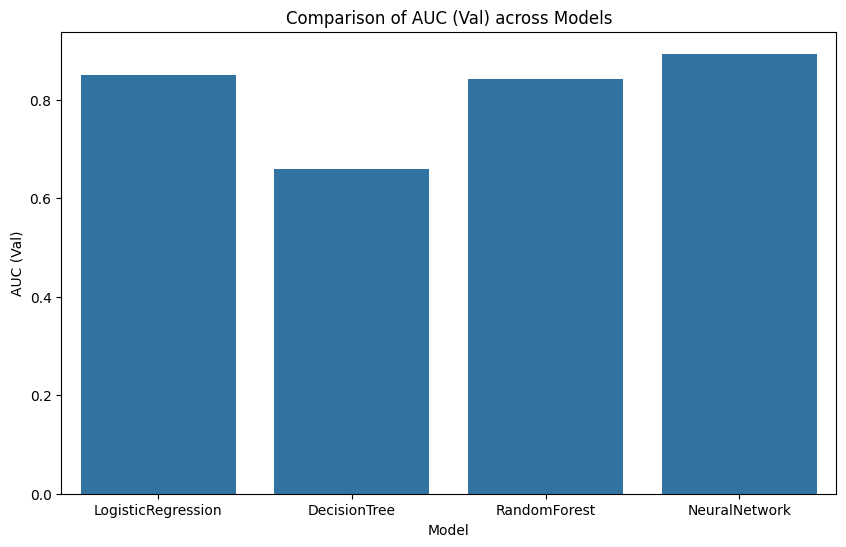

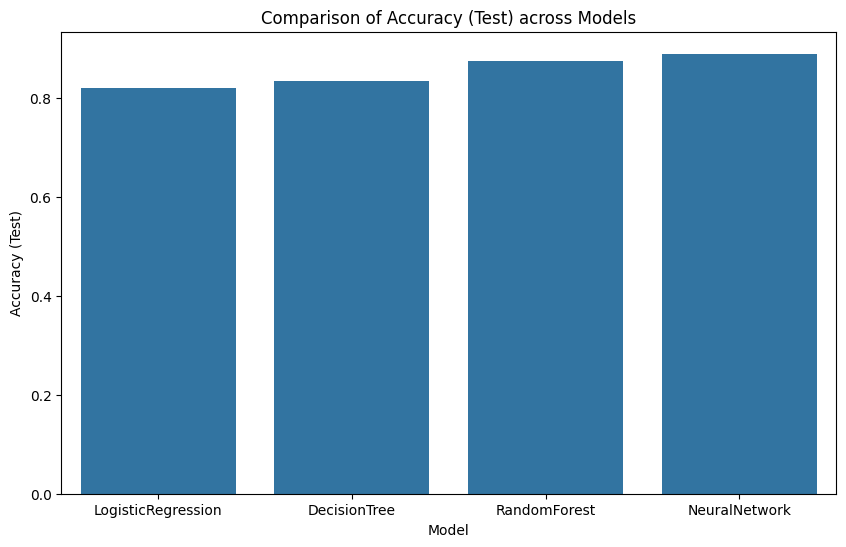

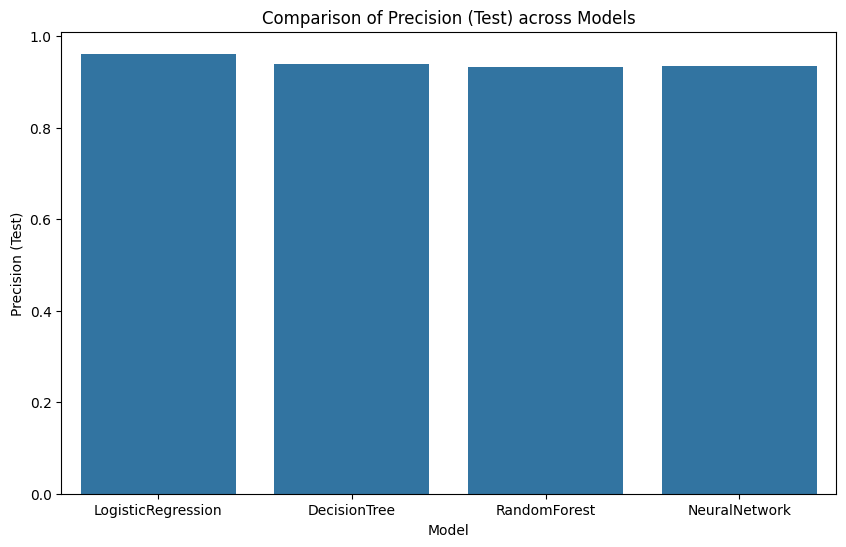

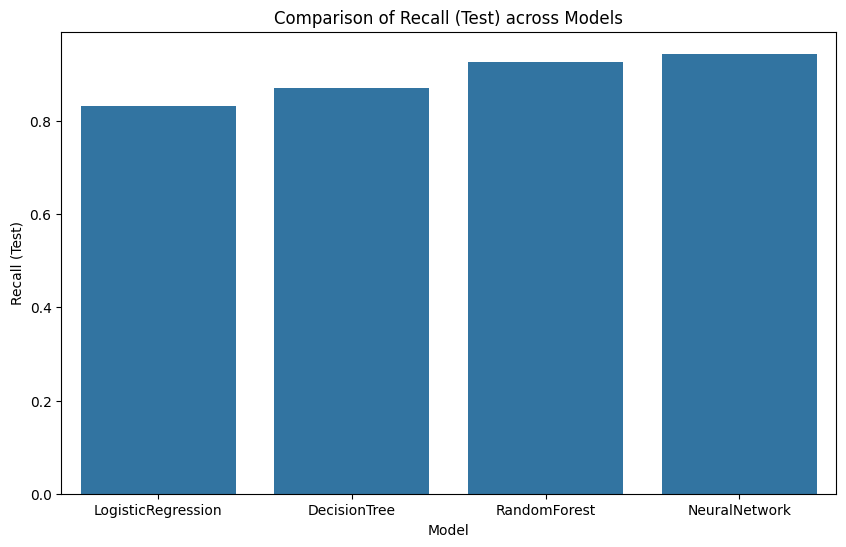

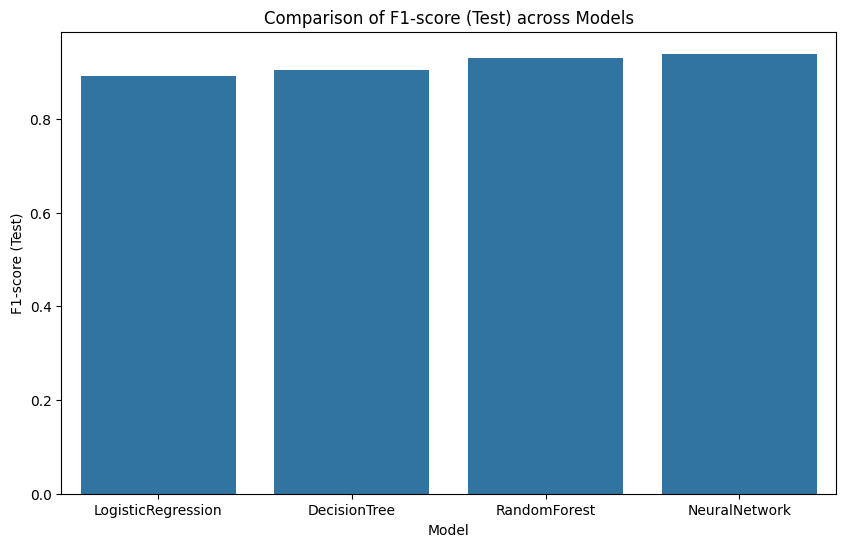

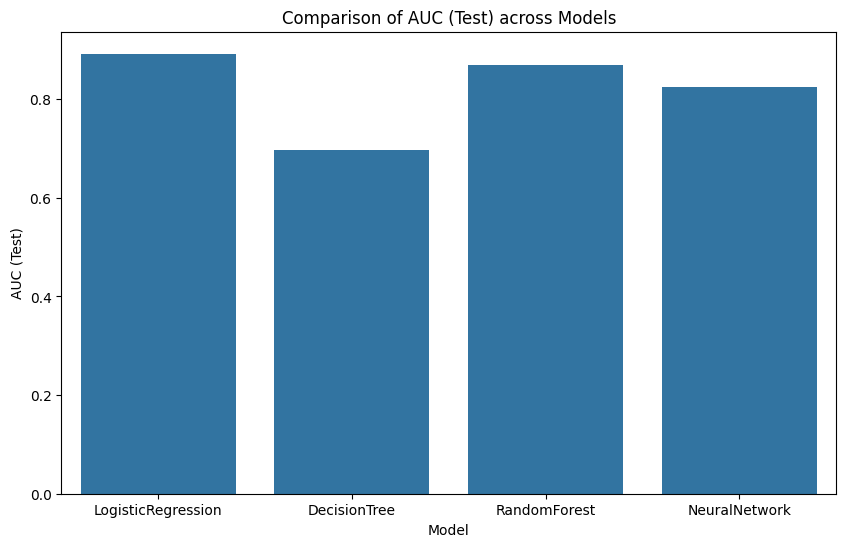

In [8]:
# Konwersja wyników do DataFrame
results_df = pd.DataFrame(results)

# Wyświetlenie tabeli wyników
print(results_df)

# Wizualizacja wyników
metrics = ['Accuracy (Val)', 'Precision (Val)', 'Recall (Val)', 'F1-score (Val)', 'AUC (Val)',
           'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1-score (Test)', 'AUC (Test)']

# Wykresy słupkowe dla każdej metryki
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Comparison of {metric} across Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()

In [10]:
import joblib
from sklearn.metrics import mean_squared_error

# Zdefiniowanie best_models jako słownik zawierający wytrenowane modele
best_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000).fit(X_train_resampled, y_train_resampled),
    'DecisionTree': DecisionTreeClassifier().fit(X_train_resampled, y_train_resampled),
    'RandomForest': RandomForestClassifier().fit(X_train_resampled, y_train_resampled),
    'NeuralNetwork': MLPClassifier(max_iter=1000).fit(X_train_resampled, y_train_resampled)
}

# Wybór najlepszego modelu na podstawie mean_squared_error
best_model_name = min(best_models, key=lambda name: mean_squared_error(y_val, best_models[name].predict(X_val)))
best_model = best_models[best_model_name]
print(f"Best model: {best_model_name}")

# Zapisanie najlepszego modelu do pliku
joblib.dump(best_model, f"{best_model_name}.joblib")

Best model: NeuralNetwork


['NeuralNetwork.joblib']

In [12]:
# Załadowanie najlepszego modelu z pliku
loaded_model = joblib.load('NeuralNetwork.joblib')
print(f"Loaded model: {loaded_model}")

Loaded model: MLPClassifier(max_iter=1000)


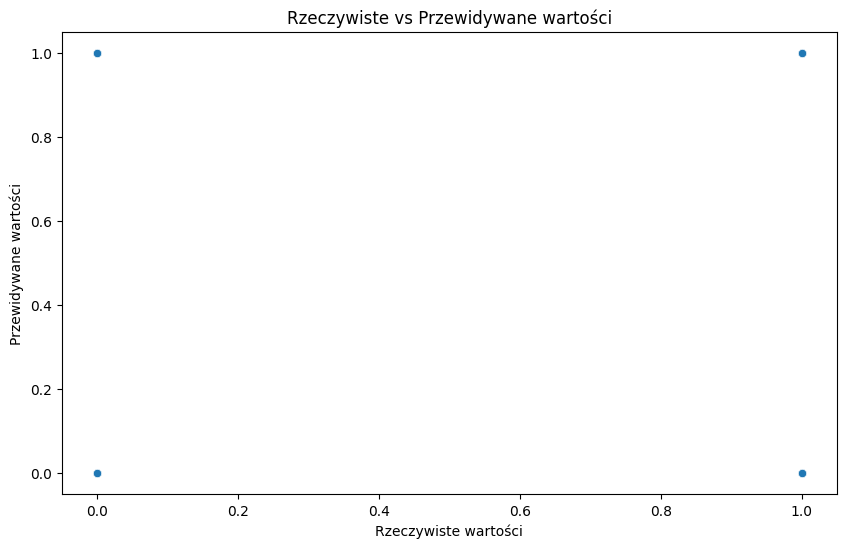

In [13]:
# Wizualizacja wyników
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=best_model.predict(X_val))
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Rzeczywiste vs Przewidywane wartości')
plt.show()

In [14]:
!pip install nbconvert

In [17]:
!ls /content

'final (1).csv'   final.csv   NeuralNetwork.joblib   sample_data


In [24]:
!pip install nbconvert

In [25]:
!ls /content

'final (1).csv'   final.csv   NeuralNetwork.joblib   sample_data


In [26]:
!cp '/content/drive/MyDrive/Colab Notebooks/Dengue-prediction2.ipynb' /content/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Dengue-prediction2.ipynb': No such file or directory


In [27]:
!ls /content/drive/MyDrive/Colab\ Notebooks/

ls: cannot access '/content/drive/MyDrive/Colab Notebooks/': No such file or directory


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
!ls /content/drive/MyDrive/Colab\ Notebooks/

 colab.ipynb
 Dengue-prediction-project.ipynb
 finance-analyse-with-numpy.ipynb
 GoogleColaboratory-basics.ipynb
'Kopia notatnika Dengue-prediction-project.ipynb'
'Kopia notatnika Time to Practice: Pandas 0 with partial solutions.ipynb'
 Matplotlib.ipynb
 numpy-rozgrzewka.ipynb
'Time to Practice_ Keras with partial solutions.ipynb'
'Time to Practice_ Numpy 0 with partial solutions.ipynb'
'Time to Practice_ Numpy 1 with partial solutions.ipynb'
'Time to Practice_ Numpy 2 with partial solutions.ipynb'
'Time to Practice_ Seaborn 0 with partial solutions.ipynb'
'Time to Practice_ Supervised Learning Classification with partial solutions.ipynb'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled.ipynb
 visualization-project.ipynb
 wind_data_analysis.ipynb


In [32]:
!cp '/content/drive/MyDrive/Colab Notebooks/Untitled6.ipynb' /content/
!jupyter nbconvert --to html /content/Untitled6.ipynb
!ls /content

[NbConvertApp] Converting notebook /content/Untitled6.ipynb to html
[NbConvertApp] Writing 2236742 bytes to /content/Untitled6.html
 drive		  final.csv		 sample_data	  Untitled6.ipynb
'final (1).csv'   NeuralNetwork.joblib	 Untitled6.html


In [33]:
from google.colab import files

files.download('/content/Untitled6.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>